# License Plate OCR Setup & Dataset Preparation

This notebook sets up the environment for license plate recognition. It:

* Mounts Google Drive for storage

* Installs required libraries (YOLOv8, PyTorch, Tesseract, etc.)

* Configures Kaggle API and downloads the dataset

* Organizes images and labels

* Runs basic OCR on sample license plate images using pytesseract



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics
!pip install torch torchvision
!pip install pytesseract
!pip install pandas
!pip install numpy
!pip install streamlit
!pip install matplotlib
!pip install tqdm
!pip install pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.4/982.4 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 848.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import os
import cv2
import re
import matplotlib.pyplot as plt
import pytesseract

In [ ]:
from google.colab import files
files.upload()   # select your kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikhithakilari","key":"d43749481adcf2a5747fff522e743816"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle config view

Configuration values from /root/.kaggle
- username: nikhithakilari
- path: None
- proxy: None
- competition: None


In [ ]:
!kaggle datasets download -d kedarsai/indian-license-plates-with-labels \
  -p /content/drive/MyDrive/project455/data/kaggle --unzip


Dataset URL: https://www.kaggle.com/datasets/kedarsai/indian-license-plates-with-labels
License(s): CC0-1.0
User cancelled operation


In [ ]:
# move all .jpg into images/ and .txt into labels/
!find /content/drive/MyDrive/project455/data/kaggle -maxdepth 1 -type f -name '*.jpg'  -exec mv {} /content/drive/MyDrive/project455/data/kaggle/images \;
!find /content/drive/MyDrive/project455/data/kaggle -maxdepth 1 -type f -name '*.txt'  -exec mv {} /content/drive/MyDrive/project455/data/kaggle/labels \;

Raw OCR on pre cropped license plates (.png files)

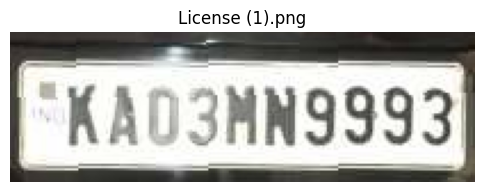

OCR → “KAD3HN9993
----------------------------------------


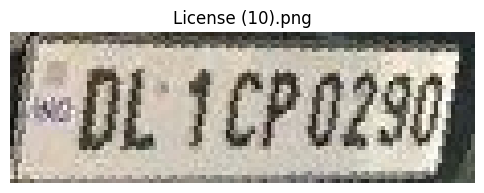

OCR → IDL 1¢P0290)
----------------------------------------


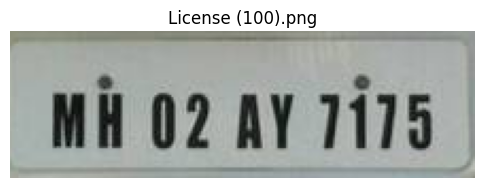

OCR → MH 02 N 1115
----------------------------------------


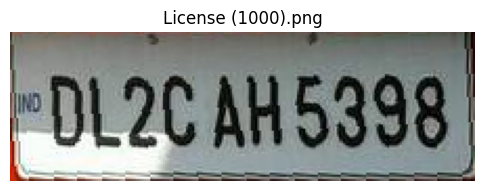

OCR → “DLC AN5398
----------------------------------------


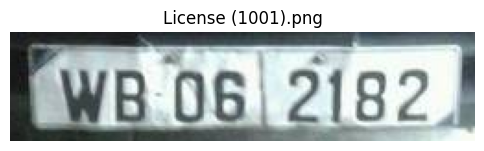

OCR → WB OS 2182 |
----------------------------------------


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pytesseract

# Build list of PNG image paths
img_dir = '/content/drive/MyDrive/project455/data/kaggle/images'
png_paths = [ os.path.join(root, f)
              for root, _, files in os.walk(img_dir)
              for f in files
              if f.lower().endswith('.png') ]
png_paths = sorted(png_paths)

# Only process the first 5 PNGs
sample_paths = png_paths[:5]

for path in sample_paths:
    img = cv2.imread(path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6,3))
    plt.imshow(rgb)
    plt.axis('off')
    plt.title(os.path.basename(path))
    plt.show()

    text = pytesseract.image_to_string(img, config='--psm 7')
    print("OCR →", text.strip())
    print("-" * 40)